ADAGRAD found at x = 2.042133630805678 after 44 iterations
GD found at x = 2.519926231779146 after 100 iterations


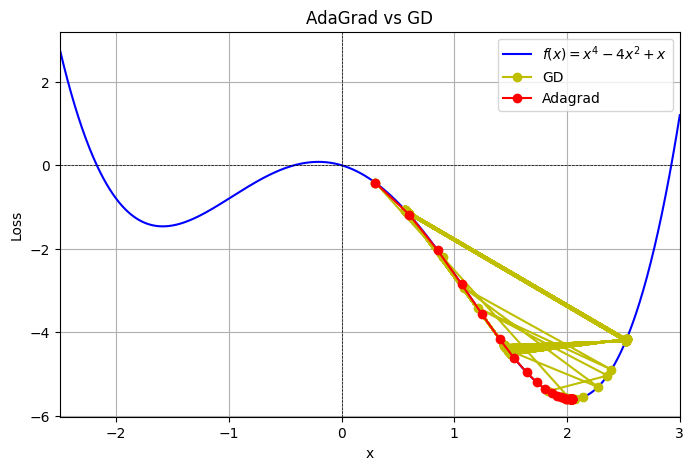

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x 
    
def df(x):  
    return 1.2*x**3 - 0.3*x**2 - 4*x - 0.8

LR,max_iters,epsilon,G = 0.3,100,1e-8,0   

# region Adagrad
x = 0.3
x_values = [x]
for i in range(max_iters):
    G+=df(x)**2
    adjusted_lr =LR/(np.sqrt(G) + epsilon)
    x_new =x - adjusted_lr * df(x)
    if abs(x_new - x) < 1e-6: break
    x_values.append(x_new)
    x = x_new

# region GD  
x1 = 0.3
x1_values = [x1]
for j in range(max_iters):
    x1_values.append(x1)
    x_new =x1 - (LR * df(x1))
    if abs(x_new - x1) < 1e-6: break
    x1 = x_new


# region Chart
x_range = np.linspace(-2.5, 3, 1000)
y_range = f(x_range)

plt.figure(figsize=(8, 5))
plt.plot(x_range, y_range, label=r'$f(x) = x^4 - 4x^2 + x$', color='b')
plt.plot(x1_values, [f(y) for y in x1_values],color='y', marker='o', label="GD")
plt.plot(x_values, [f(x) for x in x_values], color='r', marker='o', label="Adagrad")
#plt.scatter(x, f(x), color='g', s=100, label="Final Minimum", edgecolors='black')

plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
print(f"ADAGRAD found at x = {x} after {i+1} iterations")
print(f"GD found at x = {x1} after {j+1} iterations")
plt.title(f"AdaGrad vs GD")
plt.xlim(-2.5, 3)
plt.xlabel("x")
plt.ylabel("Loss")
plt.show()
# endregion

